# Logistic Regression

- Logistic regression is a model that predicts probability not class directly.
- It first calculates the score, converts score into probability using the sigmoid function and then decides the class using the threshold.

### Log Odds
Odds = P/1-P (P = Probability)

In [1]:
%pip install pandas numpy scikit-learn matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("telecom_data.csv")
print(df)

     Age  Gender  PlanType  MonthlyUsage Churn
0     21  Female   Regular            15    No
1     45  Female  Advanced            41    No
2     44  Female   Economy            40    No
3     31  Female   Regular            23   Yes
4     33  Female   Regular            12    No
..   ...     ...       ...           ...   ...
145   19  Female  Advanced             3    No
146   42  Female  Advanced            52    No
147   54  Female     Ultra             7    No
148   20  Female   Economy            57   Yes
149   31  Female  Standard            23   Yes

[150 rows x 5 columns]


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           150 non-null    int64 
 1   Gender        150 non-null    object
 2   PlanType      150 non-null    object
 3   MonthlyUsage  150 non-null    int64 
 4   Churn         150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB
None


In [5]:
df.head(10)

,Age,Gender,PlanType,MonthlyUsage,Churn
0,21,Female,Regular,15,No
1,45,Female,Advanced,41,No
2,44,Female,Economy,40,No
3,31,Female,Regular,23,Yes
4,33,Female,Regular,12,No
5,42,Female,Regular,52,No
6,20,Female,Ultra,57,Yes
7,26,Male,Ultra,23,No
8,37,Female,Advanced,31,No
9,26,Male,Economy,23,No


In [6]:
print('Columns:', df.columns.tolist())
print('\nInfo')
print(df.info())

print('\nDescribe')

# Gives statistical df
display(df.describe())

Columns: ['Age', 'Gender', 'PlanType', 'MonthlyUsage', 'Churn']

Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Age           150 non-null    int64 
 1   Gender        150 non-null    object
 2   PlanType      150 non-null    object
 3   MonthlyUsage  150 non-null    int64 
 4   Churn         150 non-null    object
dtypes: int64(2), object(3)
memory usage: 6.0+ KB
None

Describe


,Age,MonthlyUsage
count,150.000000,150.000000
mean,35.193333,33.693333
std,10.841566,15.923031
min,19.000000,3.000000
25%,25.000000,23.000000
50%,35.000000,35.000000
75%,44.000000,50.000000
max,54.000000,59.000000


### Handling missing values

In [7]:
# checks if null values are there.
print(df.isnull().sum())

# Fill missing values with mean
# df['score'] = df['score'].fillna(df['score'].mean())

# Drop rows with missing values
df = df.dropna()

Age             0
Gender          0
PlanType        0
MonthlyUsage    0
Churn           0
dtype: int64


In [8]:
# rows and columns in csv sheet
df.shape

(150, 5)

In [9]:
df.dtypes

Age              int64
Gender          object
PlanType        object
MonthlyUsage     int64
Churn           object
dtype: object

### Accuracy

<Axes: >

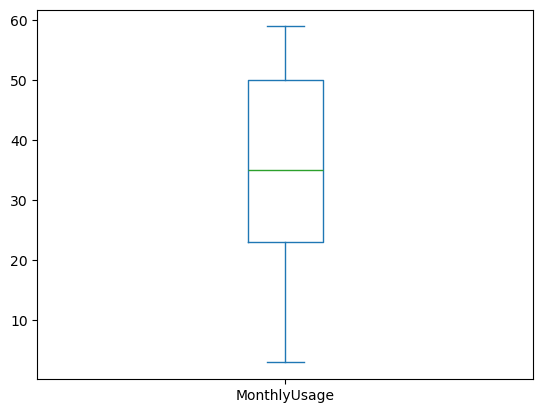

In [10]:
# visualising data
df.describe()
df['MonthlyUsage'].plot(kind='box')

## BIAS Check - Is data skewed towards 1 user group

In [11]:
print(df['Gender'].value_counts(normalize=True))
print("\n")
print(df['Churn'].value_counts(normalize=True))
# print(df['Age'].value_counts(normalize=True))

Gender
Female    0.793333
Male      0.206667
Name: proportion, dtype: float64


Churn
No     0.893333
Yes    0.106667
Name: proportion, dtype: float64


## Spec Sheet

| **Field**                | **Details**                                                                                                                                                                                                                                                                                                        |
| ------------------------ | ------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **Dataset Name**         | `telecom_data.csv`                                                                                                                                                                                                                                                                                                 |
| **Description**          | Telecom customer dataset containing demographic information, subscription plan details, usage behavior, and churn status. Used for exploratory analysis and logistic regression modeling.                                                                                                                          |
| **Features**             | `Age`, `Gender`, `PlanType`, `MonthlyUsage`, `Churn`                                                                                                                                                                                                                                                               |
| **Target Variable**      | `Churn` (Binary: Yes / No)                                                                                                                                                                                                                                                                                         |
| **Number of Rows**       | 150                                                                                                                                                                                                                                                                                                                |
| **Null Handling**        | No missing values detected across all columns. Dataset is 100% complete; no imputation required.                                                                                                                                                                                                                   |
| **Transformations**      | No value imputation performed. Data type validation completed. Categorical features (`Gender`, `PlanType`, `Churn`) prepared for encoding prior to model training. Numerical features (`Age`, `MonthlyUsage`) validated using descriptive statistics and boxplot analysis.                                         |
| **Data Quality Checks**  | **Completeness:** No null values present<br>**Consistency:** Correct and consistent data types across all features<br>**Accuracy:** Values fall within realistic and expected ranges<br>**Time-Keeping:** Not applicable (no temporal fields)<br>**Bias:** Class imbalance identified (≈79% Female, ≈89% No Churn) |
| **Exploratory Analysis** | Summary statistics (`describe()`), distribution analysis, boxplot visualization for `MonthlyUsage`, and proportional distribution checks for `Gender` and `Churn`.                                                                                                                                                 |
| **Owner**                | Student / Notebook Author                                                                                                                                                                                                                                                                                          |
| **Last Updated**         | 2025-12-09                                                                                                                                                                                                                                                                                                         |


## Separate Features and Labels

In [12]:
fdata = df.drop(columns=['Churn'])
X = fdata

y = df['Churn'].map({"yes": 1, "No": 0})

categorical = fdata.select_dtypes(include='object').columns
numerical = fdata.select_dtypes(exclude='object').columns

print("Categorical Features: ", list(categorical))
print("Numerical Features: ", list(numerical))


Categorical Features:  ['Gender', 'PlanType']
Numerical Features:  ['Age', 'MonthlyUsage']


## Feature Transformation and Representation

In [13]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_encoded_gd = pd.get_dummies(
    X, 
    columns=categorical,
    drop_first=True
)

print("gd Encoded Columns:", X_encoded_gd.columns.tolist())

print(X_encoded_gd['PlanType_Economy'].value_counts())

gd Encoded Columns: ['Age', 'MonthlyUsage', 'Gender_Male', 'PlanType_Economy', 'PlanType_Regular', 'PlanType_Standard', 'PlanType_Ultra']
PlanType_Economy
False    131
True      19
Name: count, dtype: int64


In [ ]:
OHE = OneHotEncoder(
    drop="first",
    sparse_output=False
)

encoded_array = OHE.fit_transform(X[categorical])

encoded_df = pd.DataFrame(
    encoded_array,
    columns=OHE.get_feature_names_out(categorical)
)

print(encoded_df)

X_encoded_OHE=pd.concat(
    [X[numerical].reset_index(drop=True), encoded_df.reset_index(drop=True)],
    axis=1
)
#print("OHE Encoded columns :",X_encoded_OHE.columns.tolist())




     Gender_Male  PlanType_Economy  PlanType_Regular  PlanType_Standard  \
0            0.0               0.0               1.0                0.0   
1            0.0               0.0               0.0                0.0   
2            0.0               1.0               0.0                0.0   
3            0.0               0.0               1.0                0.0   
4            0.0               0.0               1.0                0.0   
..           ...               ...               ...                ...   
145          0.0               0.0               0.0                0.0   
146          0.0               0.0               0.0                0.0   
147          0.0               0.0               0.0                0.0   
148          0.0               1.0               0.0                0.0   
149          0.0               0.0               0.0                1.0   

     PlanType_Ultra  
0               0.0  
1               0.0  
2               0.0  
3          

In [19]:
scaler = StandardScaler()
x_scaled_gd = X_encoded_gd.copy()
x_scaled_gd[numerical] = scaler.fit_transform(x_scaled_gd[numerical])

x_scaled_ohe = X_encoded_OHE.copy()
x_scaled_ohe[numerical] = scaler.fit_transform(x_scaled_ohe[numerical])

df1 = pd.DataFrame({
    'Age OHE' : x_scaled_ohe[numerical]['Age'],
    'Age_gd': x_scaled_gd[numerical]['Age'],
    'MonthlyUsage_ohe': x_scaled_gd[numerical]['MonthlyUsage'],
    'MonthlyUsage_gd': x_scaled_gd[numerical]['MonthlyUsage'],
})

print(df1)

      Age OHE    Age_gd  MonthlyUsage_ohe  MonthlyUsage_gd
0   -1.313545 -1.313545         -1.177914        -1.177914
1    0.907574  0.907574          0.460411         0.460411
2    0.815027  0.815027          0.397399         0.397399
3   -0.388079 -0.388079         -0.673814        -0.673814
4   -0.202986 -0.202986         -1.366951        -1.366951
..        ...       ...               ...              ...
145 -1.498638 -1.498638         -1.934064        -1.934064
146  0.629934  0.629934          1.153549         1.153549
147  1.740493  1.740493         -1.682014        -1.682014
148 -1.406091 -1.406091          1.468612         1.468612
149 -0.388079 -0.388079         -0.673814        -0.673814

[150 rows x 4 columns]
